In [2]:
import os
import numpy as np
import tensorflow as tf
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
reset_graph()
#셀(뉴런지정) -> step수만큼 지정된다.
n_inputs=3 #하나의 셀로 들어간다.
n_neurons=5 #셀의 뉴런이 5개(셀을 지정할 떄는 뉴런수가 지정되어야한다.)
x0=tf.placeholder(tf.float32,[None, n_inputs]) #4*3
x1=tf.placeholder(tf.float32,[None, n_inputs]) #4*3

#두개의 가중치
Wx=tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32)) #새로들어온 가중치
Wy=tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32)) #앞의 아웃풋으로 생성된 가중치
b=tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32)) #나가는 차수와 일치해야 한다.(뉴런수와 일치)

#RNN에서는 tanh(activation 많이 사용)
Y0=tf.tanh(tf.matmul(x0,Wx)+b) #4*3 3*5 -> 4*5
Y1=tf.tanh(tf.matmul(Y0,Wy)+tf.matmul(x1,Wx)+b) # (4*5 5*5)=4*5 + (4*3 3*5)=4*5 -> 4*5 + 1*5 -> 4*5
#앞의 가중치에 영향을 받고있다.(y1)
#두번째 셀을 계산 할때는 이전셀의 영향을 받는다.

x0_batch=np.array([[0,1,2],[3,4,5],[6,7,8],[9,0,1]]) #4*3
x1_batch=np.array([[9,8,7],[3,4,5],[6,5,4],[3,2,1]]) #4*3

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    Y0_val, Y1_val = sess.run([Y0,Y1], feed_dict={x0:x0_batch,x1:x1_batch})
print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val))
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val))

Y0_val:(4, 5)
[[-0.0664006   0.9625767   0.68105793  0.7091854  -0.898216  ]
 [ 0.9977755  -0.71978897 -0.9965761   0.9673924  -0.9998972 ]
 [ 0.99999774 -0.99898803 -0.9999989   0.9967762  -0.9999999 ]
 [ 1.         -1.         -1.         -0.99818915  0.9995087 ]]
Y1_val:(4, 5)
[[ 1.         -1.         -1.          0.40200275 -0.9999998 ]
 [ 0.99715763 -0.16742194 -0.81356543 -0.6802668  -0.9999393 ]
 [ 0.9999983  -0.9999994  -0.9999975  -0.8594331  -0.9999881 ]
 [ 0.99928284 -0.99999803 -0.9999058   0.9857963  -0.92205757]]


In [4]:
#RNN
reset_graph() #커널 재실행
n_inputs = 3
n_neurons = 5
x0 = tf.placeholder(tf.float32, [None, n_inputs])
x1 = tf.placeholder(tf.float32, [None, n_inputs])

#입력데이터 4*3, 출력데이터 4*5(2개=셀수를 의미한다., 5=뉴런수)
#입력데이터 2*4*3 출력데이터 2*4*5 (입력데이터=2개, 셀수=4개, step수=3개, 뉴런수=5개)
#가중치 3*5의 가중치
#하나의 셀은 입력이3개 출력이 5개 총 4개의 셀이 존재
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, reuse=True) #기존의 셀을 지속적으로 사용하고자 할때 셀에 reuse=True 입력
output_seqs, states = tf.nn.static_rnn(cell=basic_cell, inputs=[x0,x1], dtype=tf.float32) #아웃풋과 스테이트로 return된다.
Y0,Y1 = output_seqs
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    Y0_val, Y1_val = sess.run([Y0,Y1],feed_dict={x0:x0_batch, x1:x1_batch})
print('Y0_val : {}\n{}'.format(Y0_val.shape, Y0_val))
print('Y1_val : {}\n{}'.format(Y1_val.shape, Y1_val)) #이전데이터에 영향을 받은 이후데이터

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Y0_val : (4, 5)
[[ 0.30741334 -0.32884315 -0.6542847  -0.9385059   0.52089024]
 [ 0.99122757 -0.9542541  -0.7518079  -0.9995208   0.9820235 ]
 [ 0.9999268  -0.99783254 -0.8247353  -0.9999963   0.99947774]
 [ 0.996771   -0.68750614  0.8419969   0.9303911   0.8120684 ]]
Y1_val : (4, 5)
[[ 0.99998885 -0.99976057 -0.06679279 -0.9999803   0.99982214]
 [ 0.95896024 -0.98513234 -0.8802321  -0.99987715  0.97851926]
 [ 0.998624   -0.99715203 -0.03308626 -0.9991566   0.9932902 ]
 [ 0.99681675 -0.9598194   0.39660627 -0.8307606   0.79671973]]


In [19]:
reset_graph()
n_steps = 2
n_inputs = 3
n_neurons = 5

x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
x_seqs = tf.unstack(tf.transpose(x,perm=[1,0,2])) #2*4*5
seq_length = tf.placeholder(tf.int32, [None]) # 시퀀스 길이를 넣어줄 placeholder
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) #x_seqs로 만들어진 데이터, 셀step4개
#셀이 만들어진 갯수대로 다음셀에 영향을 미쳐서 계산된다.
output_seqs, states = tf.nn.static_rnn(basic_cell, x_seqs, dtype=tf.float32) #x_seqs = 2*4*5

outputs = tf.transpose(tf.stack(output_seqs),perm=[1,0,2]) #4*2*5

#입력데이터 4*2*3, 뉴런수 5개, 스텝수 2개, 미니배치 4개(한번의 연산에 사용된 데이터의 갯수)
#입력데이터 (미니배치size*step수(셀수)*input data)
#출력데이터 (미니배치size*step수(셀수)*뉴런수)
X_batch = np.array([ # t = 0 t = 1 
    [[0, 1, 2], [9, 8, 7]], # 샘플 1 
    [[3, 4, 5], [0, 0, 0]], # 샘플 2 (0 벡터로 패딩) 
    [[6, 7, 8], [6, 5, 4]], # 샘플 3 
    [[9, 0, 1], [3, 2, 1]], # 샘플 4 
])

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    outputs_val = outputs.eval(feed_dict={x:X_batch})
    
print('outputs_val:{}\n{}'.format(outputs_val.shape, outputs_val))
#출력데이터 4*2*5

outputs_val:(4, 2, 5)
[[[ 0.4448051   0.5314507  -0.6511994   0.76431936 -0.6179447 ]
  [ 0.91747165 -0.9646751   0.99996394  0.9969947  -0.9995878 ]]

 [[ 0.78555936 -0.04964171  0.5736833   0.9923836  -0.9838792 ]
  [-0.47700563  0.11303946 -0.2030838  -0.67330927 -0.1867441 ]]

 [[ 0.92764693 -0.59896386  0.9694679   0.99978125 -0.9994409 ]
  [-0.15722841 -0.95242536  0.9972465   0.9471439  -0.9929556 ]]

 [[ 0.27442402 -0.9999334   0.99985826  0.49196172 -0.9598539 ]
  [-0.705385   -0.88927376  0.9683704   0.56247634 -0.7331893 ]]]


In [61]:
#mnist 를 RNN으로 구현
reset_graph()
n_steps=28 #셀의 갯수
n_inputs=28 #input 수
n_neurons=150 #셀당 출력되는 데이터 수 
n_outputs=10 #FFNN을 통과하고 마지막 클래수 수

In [62]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [63]:
#train 55000 test 10000
#keras에 있는놈은 이미지로 들어오기 때문에 784형태로 바꿔준다.
train_x = train_x.astype(np.float32).reshape(-1,28*28)/255.0 #/255 -> 이미지 정규화
test_x = test_x.astype(np.float32).reshape(-1,28*28)/255.0
train_y = train_y.astype(np.int32) #ohefot인코딩이 안되어있다.
test_y = test_y.astype(np.int32)
valid_x, train_x = train_x[:5000], train_x[5000:] #validation 데이터를 주었다.
valid_y, train_y = train_y[:5000], train_y[5000:]
#test, valid 는 reshape해주었다. (이미지 형태로 넣기위해)
test_x = test_x.reshape([-1, n_steps, n_inputs])
valid_x = valid_x.reshape([-1, n_steps, n_inputs])

print('train_x.shape : ', train_x.shape)
print('test_x.shape : ', test_x.shape)
print('valid_x.shape :', valid_x.shape)

train_x.shape :  (55000, 784)
test_x.shape :  (10000, 28, 28)
valid_x.shape : (5000, 28, 28)


In [43]:
def shuffle_batch(features, labels, batch_size):
    #feature - 입력데이터, 훈련데이터, 독립변수의 갯수
    rnd_idx = np.random.permutation(len(features)) #permutation - 순열을 만든다.(난수를 생성해서 랜덤 인덱스를 줘라 순서를 섞는다.)
    n_batches = len(features)//batch_size #전체데이터를 한번돌릴때 배치가 몇번 돌아야하냐(배치 실행 횟수)
    for batch_idx in np.array_split(rnd_idx, n_batches):
        #rnd_idx를 n_batches 만큼 split한다.
        batch_x, batch_y = features[batch_idx], labels[batch_idx] #독립변수, 종속변수에서 뽑는다.
        #비동기 방식으로 진행 yield(호출되면 작동하고 멈춘다.(다른요청을 기다릴때는 stop))
        #계속 실핸되는것이 아니고 멈췄다가 다음배치를 주고 멈췄다가 주고 한다.
        yield batch_x, batch_y

In [44]:
reset_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #None 몇개가올지모른다., step-28셀수(행), input-28셀당변수수(열)
labels = tf.placeholder(tf.int32, [None])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) #cell만들때는 기본적으로 neuron수를 넣는다.
outputs, states = tf.nn.dynamic_rnn(basic_cell, inputs, dtype=tf.float32) #inputs = 150*28*28 을보고 망을 구성한다.(셀개수와 input수)
#dynamicRNN 반복문을 이용해서 들어오는 것만큼 공간할당 메모리 낭비를 줄인다., 비정형 데이터를 받을 수 있다.
#output 150*28*150, state 150*150(minibatch갯수와 뉴런의 갯수로 리턴된다.)
logits = tf.layers.dense(states, n_outputs)#dense - fullyconnected 망
#150*150 150*10(자동생성된 가중치) -> logits =150*10
xentropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))#cost function

learning_rate = 0.01
n_epochs = 5
batch_size = 150
train_op = tf.train.AdamOptimizer(learning_rate).minimize(xentropy)
correct = tf.nn.in_top_k(logits, labels, 1) #logits값으로 담는다.
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) #맞춘놈1 못맞춘놈0 으로 sccuracy계산

In [45]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        #epoch=5
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            #in 뒤에 올수있는것 collecions(집단으로 데이터를 저장할 수 있는 list, dict)
            #generator(생성자), enumerator
            #333번 돌아감(55000/150)
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, feed_dict={inputs:batch_x, labels:batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs:batch_x, labels:batch_y}) #훈련에 참가한 데이터
        acc_valid = accuracy.eval(feed_dict={inputs:valid_x, labels:valid_y}) #훈련에 참여하지 않은 데이터 5000개로 측정
        #과적합 확인(규제를 준다, dropout 많은계산량 줄이고, early stoping), 과소적합(데이터더 필요, 최적화 필요)
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch), 'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid), 
              'loss_batch : {:.4f}'.format(loss_batch))

epoch : 000 acc_batch : 0.1000, acc_valid : 0.0948 loss_batch : 2.3527
epoch : 001 acc_batch : 0.1000, acc_valid : 0.1020 loss_batch : 2.3625
epoch : 002 acc_batch : 0.1067, acc_valid : 0.1148 loss_batch : 2.3330
epoch : 003 acc_batch : 0.0667, acc_valid : 0.0974 loss_batch : 2.3414
epoch : 004 acc_batch : 0.0933, acc_valid : 0.1148 loss_batch : 2.3452


In [47]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

t_min, t_max = 0, 30 
resolution = 0.1

def time_series(t): 
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

# mini-batch function 
def next_batch(batch_size, n_steps): 
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution) 
    Ts = t0 + np.arange(0., n_steps + 1) * resolution 
    ys = time_series(Ts) 
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

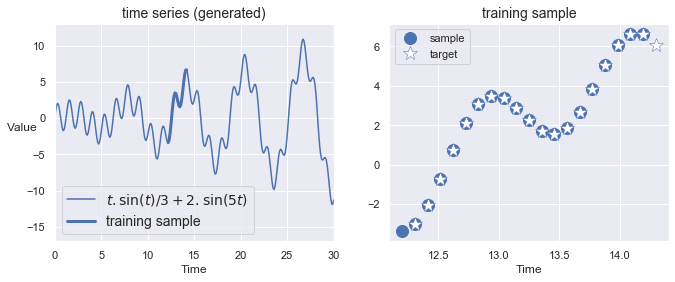

In [48]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20 
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4)) 
plt.subplot(121) 
plt.title("time series (generated)", fontsize=14) 
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$") 
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="training sample") 
plt.legend(loc="lower left", fontsize=14) 
plt.axis([0, 30, -17, 13]) 
plt.xlabel("Time") 
plt.ylabel("Value", rotation=0)

plt.subplot(122) 
plt.title("training sample", fontsize=14) 
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="sample") 
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14, label="target") 
plt.legend(loc="upper left") 
plt.xlabel("Time")

plt.show()

In [51]:
reset_graph()

# Layer Params
n_steps = 20 
n_neurons = 100 
n_inputs = 1 
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) 
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# RNN Model 
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) 
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# 하나의 출력을 위한 작업 
stacked_rnn_outputs = tf.reshape(tensor=rnn_outputs, shape=[-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) 
predictions = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

# Train Params
learning_rate = 0.001 
n_iterations = 600 
batch_size = 50

# loss 
mse = tf.losses.mean_squared_error(labels=y, predictions=predictions) 
# optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mse)

# Train 
with tf.Session() as sess: 
    tf.global_variables_initializer().run() 
    for iteration in range(n_iterations): 
        batch_x, batch_y = next_batch(batch_size, n_steps) 
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y}) 
        if iteration % 100 == 0: 
            loss = mse.eval(feed_dict={X: batch_x, y: batch_y}) 
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(predictions, feed_dict={X: X_new})
    
print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))

step: 000, MSE: 13.9070
step: 100, MSE: 0.5057
step: 200, MSE: 0.2104
step: 300, MSE: 0.1041
step: 400, MSE: 0.0682
step: 500, MSE: 0.0618
y_pred:(1, 20, 1)
[[[-3.5451064]
  [-2.5237594]
  [-1.1689632]
  [ 0.546136 ]
  [ 2.0490522]
  [ 2.9901128]
  [ 3.498588 ]
  [ 3.5099547]
  [ 2.8451753]
  [ 2.1285563]
  [ 1.6292835]
  [ 1.5277606]
  [ 1.9074755]
  [ 2.6915088]
  [ 3.8608828]
  [ 5.125861 ]
  [ 6.1394496]
  [ 6.6800656]
  [ 6.6261263]
  [ 6.0294347]]]


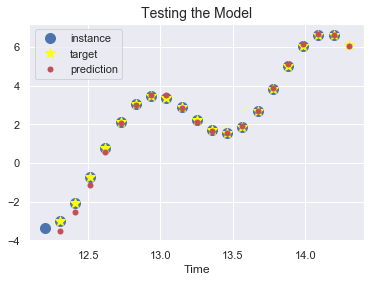

In [52]:
plt.title("Testing the Model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [ ]:
#OutputProjectionWrapper를 이용해 동일한 예제를 작성한 코드

In [53]:
reset_graph()

# Layer Params
n_steps = 20
n_neurons = 100
n_inputs = 1
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# RNN Model using OutputProjectionWrapper
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)
predictions, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# Train Params 
learning_rate = 0.001
n_iterations = 600
batch_size = 50

# loss
mse = tf.losses.mean_squared_error(labels=y, predictions=predictions)
# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mse)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [54]:
# Train
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        batch_x, batch_y = next_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if iteration % 100 == 0:
            loss = mse.eval(feed_dict={X: batch_x, y: batch_y})
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(predictions, feed_dict={X: X_new})
    
print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))

step: 000, MSE: 11.9673
step: 100, MSE: 0.5228
step: 200, MSE: 0.1500
step: 300, MSE: 0.0751
step: 400, MSE: 0.0618
step: 500, MSE: 0.0615
y_pred:(1, 20, 1)
[[[-3.5262268]
  [-2.4672015]
  [-1.1419667]
  [ 0.5639766]
  [ 2.1380877]
  [ 3.181482 ]
  [ 3.4333177]
  [ 3.2610493]
  [ 2.8540754]
  [ 2.2927241]
  [ 1.7760007]
  [ 1.4578816]
  [ 1.7960271]
  [ 2.6859846]
  [ 3.8808458]
  [ 5.125532 ]
  [ 6.1072383]
  [ 6.6790466]
  [ 6.6470914]
  [ 6.0377955]]]


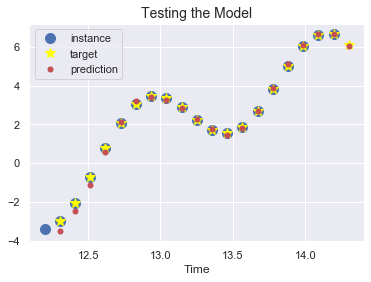

In [55]:
plt.title("Testing the Model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [56]:
#텐서플로에서는 tf.nn.rnn_cell.MultiRNNCell을 이용해 RNN Cell을 여러층으로 쌓을 수 있는데 
#먼저 BasicRNNCell을 이용해 여러개의 Cell을 만들고, 이것을 MultiRNNCell로 쌓아서 deep RNN을 구현할 수 있다. 
#아래의 예제는 deep RNN을 구현한 간단한 예제 코드이다.

In [57]:
reset_graph()

# layer params 
n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

# Deep RNN
layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
          for layer in range(n_layers)]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

# Sample data
batch_x = np.random.rand(2, n_steps, n_inputs)  # shape: (2, 5, 2)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: batch_x})
    
print('outputs_val:{}'.format(outputs_val.shape))

Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
outputs_val:(2, 5, 100)


In [58]:
reset_graph()

# layer params
n_inputs = 1
n_outputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# without dropout rate
keep_prob = tf.placeholder_with_default(1.0, shape=())
cells = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.nn.rnn_cell.DropoutWrapper(
                    cell, input_keep_prob=keep_prob,
                    state_keep_prob=keep_prob) for cell in cells]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

# 하나의 출력을 위한 작업
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
predictions = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

# loss
mse = tf.losses.mean_squared_error(labels=y, predictions=predictions)

# Train Params 
learning_rate = 0.01
train_keep_prob = 0.3
n_iterations = 1500
batch_size = 50

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mse)

In [59]:
# Train
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        batch_x, batch_y = next_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y,
                                      keep_prob: train_keep_prob})
        if iteration % 300 == 0:
            loss = mse.eval(feed_dict={X: batch_x, y: batch_y})
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(predictions, feed_dict={X: X_new})

step: 000, MSE: 5.0662
step: 300, MSE: 9.1701
step: 600, MSE: 9.9832
step: 900, MSE: 13.0620
step: 1200, MSE: 12.4481


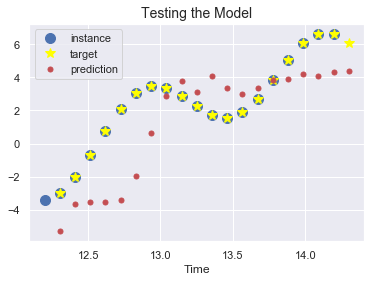

In [60]:
plt.title("Testing the Model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()